Lesson 06 Assignment 
Author: Ajai Shukla
Instructions

It is recommended you complete the lab exercises for this lesson before beginning the assignment.

Using the Bank Data csv file, create a new notebook to train, test, and evaluate an ensemble model. Perform each of the following tasks and answer the related questions:

    Read in, parse, and pre-process the data
    Perform a brief exploratory analysis
    Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
    Graph the structure of your decision tree
    Graph the confusion matrix of your random forest model


In [35]:
!pip install GraphViz

In [36]:
%matplotlib inline

# Read in, parse, and pre-process the data

In [1]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import patsy
import sklearn.linear_model as linear
import random
sns.set(style="darkgrid")
import os,sys
import xlrd
import math
from pandas.plotting import autocorrelation_plot
plt.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn import metrics as mt
import datetime
import time
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, auc
import pylab as p
from sklearn import tree
from io import BytesIO as StringIO
from IPython.display import Image
import pydotplus
from IPython.display import Image  
import pydotplus
from io import BytesIO as StringIO
import graphviz
import copy
from copy import deepcopy
from numpy import random as np_random
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model

In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_csv(r"C:\Users\ashukla\Documents\DS\bank1.csv")
print (dataframe.info())
dataframe.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
dataframe.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Perform a brief exploratory analysis

In [5]:


def examine_data_frame( df):
    for name in df.columns:
        print ("----------")
        print (df[ name].dtype)
        if df[ name].dtype is np.dtype( 'O'):
            print (df[ name].value_counts())
            print ("Name: ", name)
        else:
            print ((df[ name].describe()))

examine_data_frame(dataframe)



----------
int64
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
----------
object
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
Name:  job
----------
object
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
Name:  marital
----------
object
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
Name:  education
----------
object
no         3

In [6]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dataframe[cols]
data_dummies = pd.get_dummies(data_1)
result_df = pd.concat([data_dummies, dataframe], axis=1)
result_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,0,0,1,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,1,0,0,0,0,0,0,0,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,0,0,0,0,0,0,0,1,0,0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
result_df.columns.values # Performed one-hot encoding so that I can use it in EDA

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'pout

In [8]:
result_df['output'] = result_df['y'].apply(lambda x: 1 if x =='yes' else 0)

# Comparing Qualitative vs. Quantitative Analysis
 Number of employees vs. Output

In [9]:
grouped = result_df.groupby( "y")
nr_employed = grouped[ "nr.employed"].describe()
nr_employed = nr_employed.unstack( level=-1)
print (nr_employed)

       y  
count  no     36548.000000
       yes     4640.000000
mean   no      5176.166600
       yes     5095.115991
std    no        64.571979
       yes       87.572641
min    no      4963.600000
       yes     4963.600000
25%    no      5099.100000
       yes     5017.500000
50%    no      5195.800000
       yes     5099.100000
75%    no      5228.100000
       yes     5191.000000
max    no      5228.100000
       yes     5228.100000
dtype: float64


Conclusion:
Number of employess (mean) is less for output-yes which suggests that higher number of employees have negative impact on output

In [10]:
grouped = result_df.groupby( "y")
pdays = grouped[ "pdays"].describe()
pdays = pdays.unstack( level=-1)
print (pdays)

       y  
count  no     36548.000000
       yes     4640.000000
mean   no       984.113878
       yes      792.035560
std    no       120.656868
       yes      403.407181
min    no         0.000000
       yes        0.000000
25%    no       999.000000
       yes      999.000000
50%    no       999.000000
       yes      999.000000
75%    no       999.000000
       yes      999.000000
max    no       999.000000
       yes      999.000000
dtype: float64


Conclusion:
PDays (mean) is less for output-yes which suggests that higher higher 'pdays' have negative impact on output, which makes sense. Higher 'pdays' i.e. more number of days that passed by after the client was last contacted from a previous campaign, lesser will be chances for bank trem deposits

# Qualitative vs. Qualitative
Month vs. Output

y            no       yes
month                    
apr    0.050816  0.013086
aug    0.134092  0.015903
dec    0.002258  0.002161
jul    0.158420  0.015757
jun    0.115543  0.013572
mar    0.006555  0.006701
may    0.312785  0.021511
nov    0.089468  0.010100
oct    0.009784  0.007648
sep    0.007624  0.006215


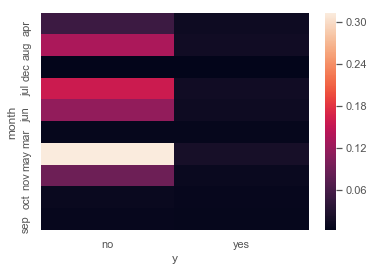

In [11]:
frequencies = pd.crosstab( result_df[ "month"], result_df[ "y"]).apply(lambda r: r/len(result_df))
print (frequencies)

sns.heatmap( frequencies)

Conclusion:

Month of May, Jun, July, August & November have negative impact on the output

# Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model

In [26]:
# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()
print(tree_mean)


0.8427796947331055


In [27]:
# Random Forest
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()
print(rand_mean)

0.8913917440620516


# Conclusion:
Random Forest model was more accurate than Decision Tree.


# Graph the structure of your decision tree and Graph the confusion matrix of your random forest model

Compare the performance between a decision tree and a random forest approach by assessing the accuracy of each model
Graph the structure of your decision tree
Graph the confusion matrix of your random forest model

In [12]:
def error_rate(true_class_data, prediction_model_data):
    fp=0.0
    fn=0.0
    for t, p in zip(true_class_data, prediction_model_data):
        if t==0 and p==1:
            fp=fp+1
        elif t==1 and p==0:
            fn=fn+1
    return (fp+fn)/len(true_class_data)

def cross_validate_10_fold( X, y, model):
    ret_scores=[]
    data
    for n in xrange(3):
        model = tree.DecisionTreeClassifier(class_weight="balanced").fit( X, y)

        # Evaluate the models using crossvalidation
        scores = 1-cross_validation.cross_val_score(model, X, y, scoring="accuracy", cv=10)
        for s in scores:
            ret_scores.append(s)
    sample_thetas=non_param_bootstrap(scores, 10000)
    ci=stats.mstats.mquantiles( sample_thetas, [0.05, 0.95])
    return ci

def resample( data):
    n = len( data)
    return [ data[ i] for i in [np_random.randint(0, n - 1) for _ in xrange( 0, n)]]

def non_param_bootstrap(original_data, num_sampling):
    return np.array( [np.mean( sample) for sample in [resample(original_data) for i in xrange( 0, num_sampling)]])

In [13]:
result_df2 = result_df[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'output']]
y = result_df2['output'].values
X = result_df2[['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']].values

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from past.builtins import xrange

In [15]:
np_random.seed(1)
ret_scores=[]

for n in xrange(3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    model = tree.DecisionTreeClassifier(class_weight = "balanced").fit( X_train, y_train)
    
    # Evaluate the models using crossvalidation
    scores = cross_val_score(model, X_test, y_test, cv =10)
    for s in scores:
        ret_scores.append(s)
sample_thetas_1=non_param_bootstrap(scores, 10000)
ci_1=stats.mstats.mquantiles( sample_thetas_1, [0.05, 0.95])

In [16]:
print ('Accuracy for DecisionTreeClassifier:', np.mean(sample_thetas_1), ci_1)

Accuracy for DecisionTreeClassifier: 0.8308367582288451 [0.82124831 0.83996544]


In [17]:
clf = tree.DecisionTreeClassifier(max_depth =1)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [18]:
tree.export_graphviz(clf,out_file='mytree.dot')

In [19]:
features = ['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age','campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [20]:
target = ['output']


In [21]:
from io import StringIO
import matplotlib.pyplot as plt

In [22]:
out = StringIO()

In [23]:
tree.export_graphviz(clf, out_file = out,feature_names=features,  
                         class_names=target,filled=True)

In [24]:
graph=pydotplus.graph_from_dot_data(out.getvalue())

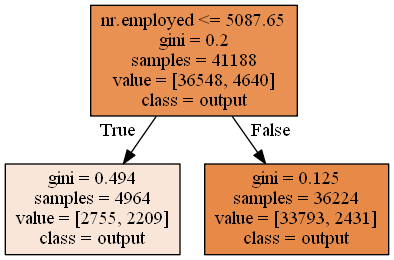

In [25]:
Image(graph.create_png())

You can also make a prediction for a single item, for example:
sepal length = 3
sepal width = 5
petal length = 4
petal width = 2
Now you can predict which type of flower it is.

In [ ]:
clf.predict([[3, 5, 4, 2]])

Finding Important Features in Scikit-learn
Here, you are finding important features or selecting features in the Bank dataset. In scikit-learn, you can perform this task in the following steps:
First, you need to create a random forests model.
Second, use the feature importance variable to see feature importance scores.
Third, visualize these scores using the seaborn library.

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [74]:
def random_forest_classifier(features, target):
    """
    To train the random forest classifier with features and target data
    :param features:
    :param target:
    :return: trained random forest classifier
    """
    clf = RandomForestClassifier()
    clf.fit(features, target)
    return clf

In [83]:
def dataset_statistics(dataframe):
    """
    Basic statistics of the dataset
    :param dataset: Pandas dataframe
    :return: None, print the basic statistics of the dataset
    """
    print (dataframe.describe())

In [84]:
def main():
    """
    Main function
    :return:
    """
    # Load the csv file into pandas dataframe
    dataframe = pd.read_csv(OUTPUT_PATH)
    # Get basic statistics of the loaded dataset
    dataset_statistics(dataframe)
 
    # Filter missing values
    dataset = handel_missing_values(dataframe, HEADERS[6], '?')
    X_train, X_test, y_train, y_test = split_dataset(dataframe, 0.7, HEADERS[1:-1], HEADERS[-1])
 
    # Train and Test dataset size details
    print ("X_train Shape :: ", X_train.shape)
    print ("y_train Shape :: ", y_train.shape)
    print ("X_test Shape :: ", X_test.shape)
    print ("y_test Shape :: ", y_test.shape)

In [85]:
# Create random forest classifier instance
trained_model = random_forest_classifier(X_train, y_train)
print ("Trained model :: ", trained_model)
predictions = trained_model.predict(X_test)


C:\Users\ashukla\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Trained model ::  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [86]:
 
for i in xrange(0, 5):
        print ("Actual outcome :: {} and Predicted outcome :: {}".format(list(y_test)[i], predictions[i]))


Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 1 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0
Actual outcome :: 0 and Predicted outcome :: 0


In [87]:
 
print ("Train Accuracy :: ", accuracy_score(y_train, trained_model.predict(X_train)))
print ("Test Accuracy  :: ", accuracy_score(y_test, predictions))
print ("Confusion matrix ", confusion_matrix(y_test, predictions))

Train Accuracy ::  0.9827269258783948
Test Accuracy  ::  0.8874322246499959
Confusion matrix  [[10621   325]
 [ 1066   345]]
